Tugas akhir submission. <br>
Nama : Cevi Taufik <br>
Email&ensp;: cevitaufik@gmail.com

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
 
import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split
 
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install split-folders

In [ ]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2021-04-19 15:00:27--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  5.14MB/s    in 67s     

2021-04-19 15:01:35 (4.58 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
import zipfile,os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
os.listdir('/tmp/rockpaperscissors')

['README_rpc-cv-images.txt',
 'train',
 'scissors',
 'rock',
 'paper',
 'val',
 'rps-cv-images']

In [ ]:
import splitfolders
base_dir = '/tmp/rockpaperscissors/rps-cv-images'
splitfolders.ratio(base_dir, output="/tmp/rockpaperscissors", seed = 1337, ratio = (.6, .4))
 
train_dir = os.path.join("/tmp/rockpaperscissors", 'train')
validation_dir = os.path.join("/tmp/rockpaperscissors", 'val')

Copying files: 2188 files [00:00, 2730.64 files/s]


In [ ]:
os.listdir('/tmp/rockpaperscissors/train')

['scissors', 'rock', 'paper']

In [ ]:
os.listdir('/tmp/rockpaperscissors/val')

['scissors', 'rock', 'paper']

In [ ]:
rock_dir = os.path.join(base_dir, 'rock')
paper_dir = os.path.join(base_dir, 'paper')
scissors_dir = os.path.join(base_dir, 'scissors')

In [ ]:
# memecah direktori menjadi data train dan data validasi
# rock
train_rock_dir, val_rock_dir = train_test_split(os.listdir(rock_dir), test_size = 0.4)
 
# paper
train_paper_dir, val_paper_dir = train_test_split(os.listdir(paper_dir), test_size = 0.4)
 
# scissors
train_scissors_dir, val_scissors_dir = train_test_split(os.listdir(scissors_dir), test_size = 0.4)
 
train_rock = os.path.join(train_dir, 'rock')
train_paper = os.path.join(train_dir, 'paper')
train_scissors = os.path.join(train_dir, 'scissors')
 
val_rock = os.path.join(validation_dir, 'rock')
val_paper = os.path.join(validation_dir, 'paper')
val_scissors = os.path.join(validation_dir, 'scissors')

In [ ]:
train_datagen = ImageDataGenerator(
                  rescale = 1./255,
                  rotation_range = 20,
                  horizontal_flip = True,
                  shear_range = 0.2,
                  fill_mode = 'nearest'
                )
 
test_datagen = ImageDataGenerator(
                  rescale = 1./255,
                  rotation_range = 20,
                  horizontal_flip = True,
                  shear_range = 0.2,
                  fill_mode = 'nearest'
                )
 
train_generator = train_datagen.flow_from_directory(
                    train_dir,
                    target_size = (150, 150),
                    batch_size = 32,
                    class_mode = 'categorical'
                  )
 
validation_generator = test_datagen.flow_from_directory(
                          validation_dir,
                          target_size = (150, 150),
                          batch_size = 32,
                          class_mode = 'categorical'
                        )

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_107 (Conv2D)          (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_75 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_108 (Conv2D)          (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_76 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_109 (Conv2D)          (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_77 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_110 (Conv2D)          (None, 15, 15, 128)     

In [ ]:
# Compile model.
initial_learning_rate = 0.0001
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=100000, decay_rate=0.96, staircase=True
)
model.compile(
    loss='categorical_crossentropy',
    optimizer=keras.optimizers.Adam(learning_rate=lr_schedule),
    metrics=['accuracy'],
)

checkpoint_cb = keras.callbacks.ModelCheckpoint(
    'rockpaperscissors', save_best_only=True
)
early_stopping_cb = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=15)

model.fit(
    train_generator,
    steps_per_epoch=25,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=5,
    callbacks=[checkpoint_cb, early_stopping_cb]
)

Epoch 1/20
25/25 [==============================] - 43s 2s/step - loss: 1.0914 - accuracy: 0.3603 - val_loss: 1.0265 - val_accuracy: 0.7437
INFO:tensorflow:Assets written to: rockpaperscissors/assets
Epoch 2/20
25/25 [==============================] - 42s 2s/step - loss: 0.9781 - accuracy: 0.6780 - val_loss: 0.7830 - val_accuracy: 0.6625
INFO:tensorflow:Assets written to: rockpaperscissors/assets
Epoch 3/20
25/25 [==============================] - 42s 2s/step - loss: 0.6999 - accuracy: 0.7564 - val_loss: 0.5247 - val_accuracy: 0.7937
INFO:tensorflow:Assets written to: rockpaperscissors/assets
Epoch 4/20
25/25 [==============================] - 42s 2s/step - loss: 0.4655 - accuracy: 0.8509 - val_loss: 0.4032 - val_accuracy: 0.8375
INFO:tensorflow:Assets written to: rockpaperscissors/assets
Epoch 5/20
25/25 [==============================] - 42s 2s/step - loss: 0.4103 - accuracy: 0.8650 - val_loss: 0.4517 - val_accuracy: 0.8500
Epoch 6/20
25/25 [==============================] - 42s 2s/s

Saving batu.png to batu (1).png
batu.png
rock


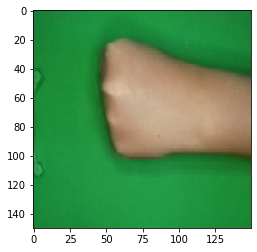

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
     
uploaded = files.upload()
     
for fn in uploaded.keys():
     
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
     
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
      
  print(fn)
  if classes[0][0]==0:
    print('rock')
  elif classes[0][1]==1:
    print('paper')
  elif classes[0][2]==2:
    print('scissor')
  else:
    print('not sure')